In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

In [2]:
N = 100 # training set data 개수
M = [0, 1, 3, 9] # 각각 0, 1, 3, 9의 차수를 가지는 다항식을 나타냄

In [3]:
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']), ignore_index=True)
    return dataset

In [4]:
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y-f(x))**2
    return np.sqrt(2*err/len(dataset))

In [5]:
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0, m+1):
        p = dataset.x**i
        p.name = "x**%d" %i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)
    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x**i)
        return y
    
    return (f, ws)


Table of the Coefficients
        M=0       M=1        M=3           M=9
0 -0.011566  0.865169  -0.064792     -0.350334
1       NaN -1.753470  10.230468     31.928938
2       NaN       NaN -30.896996   -448.630549
3       NaN       NaN  20.944464   3591.746357
4       NaN       NaN        NaN -16375.030698
5       NaN       NaN        NaN  43723.828692
6       NaN       NaN        NaN -69883.146441
7       NaN       NaN        NaN  65696.209533
8       NaN       NaN        NaN -33421.715516
9       NaN       NaN        NaN   7084.902499


<ipython-input-6-84dc0d7f2f5d>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


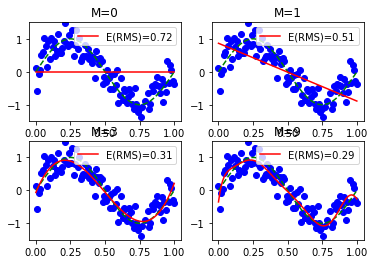

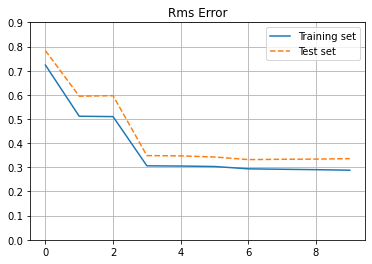

In [6]:
train_set = create_dataset(N)
test_set = create_dataset(N)
df_ws = DataFrame()

fig = plt.figure()
for c, m in enumerate(M):
    f, ws = resolve(train_set, m)
    df_ws = df_ws.append(Series(ws, name="M=%d" %m))
    
    subplot = fig.add_subplot(2, 2, c+1)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-1.5, 1.5)
    subplot.set_title("M=%d" %m)
    
    subplot.scatter(train_set.x, train_set.y, marker='o', color='blue')
    
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')
    
    linex = np.linspace(0, 1, 101)
    liney = f(linex)
    label = "E(RMS)=%.2f" %rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)
    
print("Table of the Coefficients")
print(df_ws.transpose())
fig.show()

df = DataFrame(columns=['Training set', 'Test set'])
for m in range(0, 10):
    f, ws = resolve(train_set, m)
    train_error = rms_error(train_set, f)
    test_error = rms_error(test_set, f)
    df = df.append(
            Series([train_error, test_error], index=['Training set', 'Test set']),
            ignore_index=True)
df.plot(title='Rms Error', style=['-', '--'], grid=True, ylim=(0,0.9))
plt.show()